In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [35]:
#
# load data and inspect
#
df = pd.read_csv('../Datasets/austin_weather.csv')
#
print(df.head())
print(df.tail())

         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches Visibili

In [36]:
df = df[['Date', 'TempAvgF']]
df

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50
...,...,...
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93


In [37]:
df['Year'] = df.Date.str.slice(0,4)
df

,Date,TempAvgF,Year
0,2013-12-21,60,2013
1,2013-12-22,48,2013
2,2013-12-23,45,2013
3,2013-12-24,46,2013
4,2013-12-25,50,2013
...,...,...,...
1314,2017-07-27,89,2017
1315,2017-07-28,91,2017
1316,2017-07-29,92,2017
1317,2017-07-30,93,2017


In [38]:
df['Month'] = df.Date.str.slice(5,7)
df

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12
...,...,...,...,...
1314,2017-07-27,89,2017,07
1315,2017-07-28,91,2017,07
1316,2017-07-29,92,2017,07
1317,2017-07-30,93,2017,07


In [39]:
df['Day'] = df.Date.str.slice(8,10)
df

,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25
...,...,...,...,...,...
1314,2017-07-27,89,2017,07,27
1315,2017-07-28,91,2017,07,28
1316,2017-07-29,92,2017,07,29
1317,2017-07-30,93,2017,07,30


In [40]:
df['MA'] = df.TempAvgF.rolling(20).mean()
df

,Date,TempAvgF,Year,Month,Day,MA
0,2013-12-21,60,2013,12,21,NaN
1,2013-12-22,48,2013,12,22,NaN
2,2013-12-23,45,2013,12,23,NaN
3,2013-12-24,46,2013,12,24,NaN
4,2013-12-25,50,2013,12,25,NaN
...,...,...,...,...,...,...
1314,2017-07-27,89,2017,07,27,88.95
1315,2017-07-28,91,2017,07,28,89.10
1316,2017-07-29,92,2017,07,29,89.25
1317,2017-07-30,93,2017,07,30,89.50


In [41]:
# select Year 2016
df2016 = df[df.Year == '2016'].reset_index()
df2016

,index,Date,TempAvgF,Year,Month,Day,MA
0,741,2016-01-01,46,2016,01,01,56.10
1,742,2016-01-02,45,2016,01,02,55.35
2,743,2016-01-03,52,2016,01,03,55.00
3,744,2016-01-04,48,2016,01,04,54.20
4,745,2016-01-05,46,2016,01,05,53.75
...,...,...,...,...,...,...,...
361,1102,2016-12-27,69,2016,12,27,55.15
362,1103,2016-12-28,73,2016,12,28,56.60
363,1104,2016-12-29,60,2016,12,29,57.60
364,1105,2016-12-30,52,2016,12,30,58.00


In [42]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     366 non-null    int64  
 1   Date      366 non-null    object 
 2   TempAvgF  366 non-null    int64  
 3   Year      366 non-null    object 
 4   Month     366 non-null    object 
 5   Day       366 non-null    object 
 6   MA        366 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


In [46]:
df2016['Day_of_Year'] = df2016.index+1
df2016

,index,Date,TempAvgF,Year,Month,Day,MA,Day_of_Year
0,741,2016-01-01,46,2016,01,01,56.10,1
1,742,2016-01-02,45,2016,01,02,55.35,2
2,743,2016-01-03,52,2016,01,03,55.00,3
3,744,2016-01-04,48,2016,01,04,54.20,4
4,745,2016-01-05,46,2016,01,05,53.75,5
...,...,...,...,...,...,...,...,...
361,1102,2016-12-27,69,2016,12,27,55.15,362
362,1103,2016-12-28,73,2016,12,28,56.60,363
363,1104,2016-12-29,60,2016,12,29,57.60,364
364,1105,2016-12-30,52,2016,12,30,58.00,365


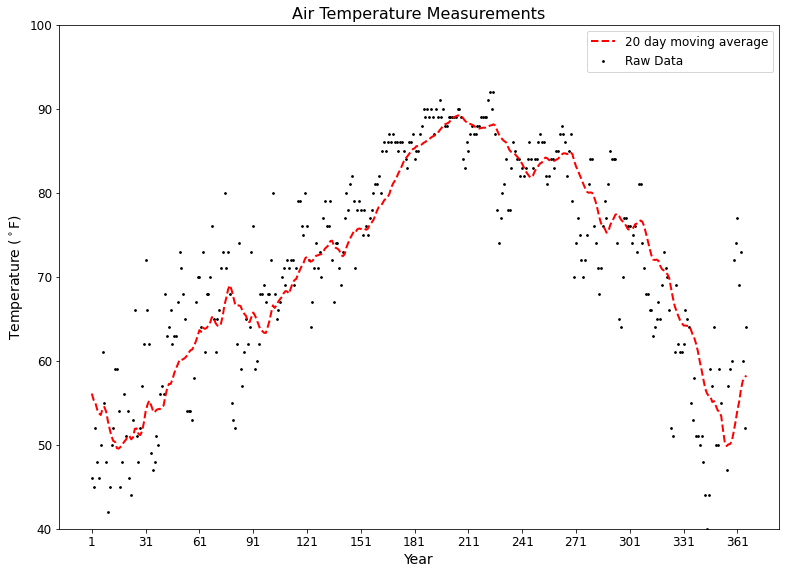

In [52]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df2016.Day_of_Year, df2016.TempAvgF, 
           label = 'Raw Data', 
           c = 'k',
           s = 3)

#
# moving average
#
ax.plot(df2016.Day_of_Year, df2016.MA, 
        c = "red",
        linestyle = '--',
        linewidth = 2,
        label = '20 day moving average')

# #
# # linear fit
# #
# ax.plot(pred_X, pred_Y, 
#         c = "blue",
#         linestyle = '-.',
#         linewidth = 4,
#         label = 'linear fit')

#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_ylim(40, 100)

tick_days = range(df2016.Day_of_Year.min(), df2016.Day_of_Year.max(), 30)
ax.set_xticks(tick_days)

ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [53]:
linear_model = LinearRegression(fit_intercept = True) 
linear_model.fit(df2016['Day_of_Year'].values.reshape((-1, 1)),
                 df2016.TempAvgF)
print('model slope = ', linear_model.coef_[0])
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df2016['Day_of_Year'].values.reshape((-1, 1)),
                        df2016.TempAvgF)
print('r squared = ', r2)

model slope =  0.02862718150394282
model intercept =  66.38079197544725
r squared =  0.05422511876098446


In [54]:
#
# generate predictions for visualization
#
pred_X = df2016.loc[:, 'Day_of_Year']
pred_Y = linear_model.predict(df2016['Day_of_Year'].values.reshape((-1, 1)))
pred_Y        

array([66.40941916, 66.43804634, 66.46667352, 66.4953007 , 66.52392788,
       66.55255506, 66.58118225, 66.60980943, 66.63843661, 66.66706379,
       66.69569097, 66.72431815, 66.75294533, 66.78157252, 66.8101997 ,
       66.83882688, 66.86745406, 66.89608124, 66.92470842, 66.95333561,
       66.98196279, 67.01058997, 67.03921715, 67.06784433, 67.09647151,
       67.12509869, 67.15372588, 67.18235306, 67.21098024, 67.23960742,
       67.2682346 , 67.29686178, 67.32548897, 67.35411615, 67.38274333,
       67.41137051, 67.43999769, 67.46862487, 67.49725205, 67.52587924,
       67.55450642, 67.5831336 , 67.61176078, 67.64038796, 67.66901514,
       67.69764232, 67.72626951, 67.75489669, 67.78352387, 67.81215105,
       67.84077823, 67.86940541, 67.8980326 , 67.92665978, 67.95528696,
       67.98391414, 68.01254132, 68.0411685 , 68.06979568, 68.09842287,
       68.12705005, 68.15567723, 68.18430441, 68.21293159, 68.24155877,
       68.27018595, 68.29881314, 68.32744032, 68.3560675 , 68.38

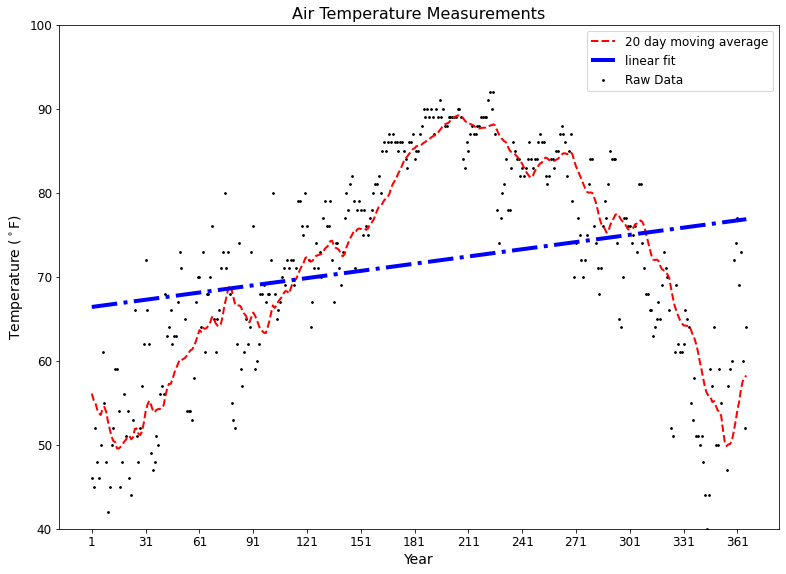

In [55]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df2016.Day_of_Year, df2016.TempAvgF, 
           label = 'Raw Data', 
           c = 'k',
           s = 3)

#
# moving average
#
ax.plot(df2016.Day_of_Year, df2016.MA, 
        c = "red",
        linestyle = '--',
        linewidth = 2,
        label = '20 day moving average')

#
# linear fit
#
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')

#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_ylim(40, 100)

tick_days = range(df2016.Day_of_Year.min(), df2016.Day_of_Year.max(), 30)
ax.set_xticks(tick_days)

ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()